# Custom Object Detection

## Install Library

In [ ]:
%pip install azure-cognitiveservices-vision-customvision

## Load Azure Configuration

In [1]:
import os
# retrieve environment variables
training_endpoint = os.environ["AZURE_CUSTOM_VISION_TRAINING_ENDPOINT"]
training_key = os.environ["AZURE_CUSTOM_VISION_TRAINING_KEY"]
prediction_endpoint = os.environ["AZURE_CUSTOM_VISION_PREDICTION_ENDPOINT"]
prediction_key = os.environ["AZURE_CUSTOM_VISION_PREDICTION_KEY"]
prediction_resource_id = os.environ["AZURE_CUSTOM_VISION_PREDICTION_RESOURCE_ID"]

## Authenticate the client

In [2]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import time, uuid

credentials = ApiKeyCredentials(in_headers={"Training-key": training_key})
trainer = CustomVisionTrainingClient(training_endpoint, credentials)
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(prediction_endpoint, prediction_credentials)

## Create New Custom Vision Project

In [8]:
publish_iteration_name = "detectModel"

# Find the object detection domain
obj_detection_domain = next(domain for domain in trainer.get_domains() if domain.type == "ObjectDetection" and domain.name == "General")

# Create a new project
print ("Creating project...")
# Use uuid to avoid project name collisions.
project = trainer.create_project(str(uuid.uuid4()), domain_id=obj_detection_domain.id)
print("Project created with id: {}".format(project.id))

Creating project...
Project created with id: 0b5b62ad-0be9-419a-adb2-59ec56294445


In [9]:
# Assuming trainer.get_domains() returns a list of Domain objects
domains = trainer.get_domains()

# Iterate through each Domain object and print its attributes
for domain in domains:
    print(f"ID: {domain.id}")
    print(f"Name: {domain.name}")
    print(f"Type: {domain.type}")
    print(f"Exportable: {domain.exportable}")
    print("-" * 40)

ID: 2e37d7fb-3a54-486a-b4d6-cfc369af0018
Name: General [A2]
Type: Classification
Exportable: False
----------------------------------------
ID: a8e3c40f-fb4a-466f-832a-5e457ae4a344
Name: General [A1]
Type: Classification
Exportable: False
----------------------------------------
ID: ee85a74c-405e-4adc-bb47-ffa8ca0c9f31
Name: General
Type: Classification
Exportable: False
----------------------------------------
ID: c151d5b5-dd07-472a-acc8-15d29dea8518
Name: Food
Type: Classification
Exportable: False
----------------------------------------
ID: ca455789-012d-4b50-9fec-5bb63841c793
Name: Landmarks
Type: Classification
Exportable: False
----------------------------------------
ID: b30a91ae-e3c1-4f73-a81e-c270bff27c39
Name: Retail
Type: Classification
Exportable: False
----------------------------------------
ID: 45badf75-3591-4f26-a705-45678d3e9f5f
Name: Adult
Type: Classification
Exportable: False
----------------------------------------
ID: a1db07ca-a19a-4830-bae8-e004a42dc863
Name: Ge

## Add Tags to the Project

In [10]:
# Make two tags in the new project
fork_tag = trainer.create_tag(project.id, "fork")
scissors_tag = trainer.create_tag(project.id, "scissors")

## Upload and Tag Images
The coordinates must be in the order of left, top, width, height

In [11]:
fork_image_regions = {
    "fork_1": [ 0.145833328, 0.3509314, 0.5894608, 0.238562092 ],
    "fork_2": [ 0.294117659, 0.216944471, 0.534313738, 0.5980392 ],
    "fork_3": [ 0.09191177, 0.0682516545, 0.757352948, 0.6143791 ],
    "fork_4": [ 0.254901975, 0.185898721, 0.5232843, 0.594771266 ],
    "fork_5": [ 0.2365196, 0.128709182, 0.5845588, 0.71405226 ],
    "fork_6": [ 0.115196079, 0.133611143, 0.676470637, 0.6993464 ],
    "fork_7": [ 0.164215669, 0.31008172, 0.767156839, 0.410130739 ],
    "fork_8": [ 0.118872553, 0.318251669, 0.817401946, 0.225490168 ],
    "fork_9": [ 0.18259804, 0.2136765, 0.6335784, 0.643790841 ],
    "fork_10": [ 0.05269608, 0.282303959, 0.8088235, 0.452614367 ],
    "fork_11": [ 0.05759804, 0.0894935, 0.9007353, 0.3251634 ],
    "fork_12": [ 0.3345588, 0.07315363, 0.375, 0.9150327 ],
    "fork_13": [ 0.269607842, 0.194068655, 0.4093137, 0.6732026 ],
    "fork_14": [ 0.143382356, 0.218578458, 0.7977941, 0.295751631 ],
    "fork_15": [ 0.19240196, 0.0633497, 0.5710784, 0.8398692 ],
    "fork_16": [ 0.140931368, 0.480016381, 0.6838235, 0.240196079 ],
    "fork_17": [ 0.305147052, 0.2512582, 0.4791667, 0.5408496 ],
    "fork_18": [ 0.234068632, 0.445702642, 0.6127451, 0.344771236 ],
    "fork_19": [ 0.219362751, 0.141781077, 0.5919118, 0.6683006 ],
    "fork_20": [ 0.180147052, 0.239820287, 0.6887255, 0.235294119 ]
}

scissors_image_regions = {
    "scissors_1": [ 0.4007353, 0.194068655, 0.259803921, 0.6617647 ],
    "scissors_2": [ 0.426470578, 0.185898721, 0.172794119, 0.5539216 ],
    "scissors_3": [ 0.289215684, 0.259428144, 0.403186262, 0.421568632 ],
    "scissors_4": [ 0.343137264, 0.105833367, 0.332107842, 0.8055556 ],
    "scissors_5": [ 0.3125, 0.09766343, 0.435049027, 0.71405226 ],
    "scissors_6": [ 0.379901975, 0.24308826, 0.32107842, 0.5718954 ],
    "scissors_7": [ 0.341911763, 0.20714055, 0.3137255, 0.6356209 ],
    "scissors_8": [ 0.231617644, 0.08459154, 0.504901946, 0.8480392 ],
    "scissors_9": [ 0.170343131, 0.332957536, 0.767156839, 0.403594762 ],
    "scissors_10": [ 0.204656869, 0.120539248, 0.5245098, 0.743464053 ],
    "scissors_11": [ 0.05514706, 0.159754932, 0.799019635, 0.730392158 ],
    "scissors_12": [ 0.265931368, 0.169558853, 0.5061275, 0.606209159 ],
    "scissors_13": [ 0.241421565, 0.184264734, 0.448529422, 0.6830065 ],
    "scissors_14": [ 0.05759804, 0.05027781, 0.75, 0.882352948 ],
    "scissors_15": [ 0.191176474, 0.169558853, 0.6936275, 0.6748366 ],
    "scissors_16": [ 0.1004902, 0.279036, 0.6911765, 0.477124184 ],
    "scissors_17": [ 0.2720588, 0.131977156, 0.4987745, 0.6911765 ],
    "scissors_18": [ 0.180147052, 0.112369314, 0.6262255, 0.6666667 ],
    "scissors_19": [ 0.333333343, 0.0274019931, 0.443627447, 0.852941155 ],
    "scissors_20": [ 0.158088237, 0.04047389, 0.6691176, 0.843137264 ]
}

In [12]:
# Define the base location for the images
base_image_location = "../Data/customobjectdetection/"

# Initialize a list to hold the tagged images with regions
print("Adding images...")
tagged_images_with_regions = []

# Loop through the fork images and their regions
for file_name in fork_image_regions.keys():
    x, y, w, h = fork_image_regions[file_name]
    # Create a region for the fork tag
    regions = [Region(tag_id=fork_tag.id, left=x, top=y, width=w, height=h)]

    # Open the image file and read its contents
    with open(os.path.join(base_image_location, "fork", file_name + ".jpg"), mode="rb") as image_contents:
        # Append the image and its regions to the list
        tagged_images_with_regions.append(ImageFileCreateEntry(name=file_name, contents=image_contents.read(), regions=regions))

# Loop through the scissors images and their regions
for file_name in scissors_image_regions.keys():
    x, y, w, h = scissors_image_regions[file_name]
    # Create a region for the scissors tag
    regions = [Region(tag_id=scissors_tag.id, left=x, top=y, width=w, height=h)]

    # Open the image file and read its contents
    with open(os.path.join(base_image_location, "scissors", file_name + ".jpg"), mode="rb") as image_contents:
        # Append the image and its regions to the list
        tagged_images_with_regions.append(ImageFileCreateEntry(name=file_name, contents=image_contents.read(), regions=regions))

# Upload the images to the Custom Vision project
upload_result = trainer.create_images_from_files(project.id, ImageFileCreateBatch(images=tagged_images_with_regions))

# Check if the upload was successful
if not upload_result.is_batch_successful:
    print("Image batch upload failed.")
    for image in upload_result.images:
        print("Image status: ", image.status)
    exit(-1)

Adding images...


## Train the project

In [13]:
print ("Training...")
iteration = trainer.train_project(project.id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

Training...
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training


## Publish the current iteration

In [14]:
# The iteration is now trained. Publish it to the project endpoint
trainer.publish_iteration(project.id, iteration.id, publish_iteration_name, prediction_resource_id)
print ("Done!")

Done!


## Test the prediction endpoint

	fork: 81.24% bbox.left = 0.05, bbox.top = 0.21, bbox.width = 0.71, bbox.height = 0.66
	fork: 0.84% bbox.left = 0.57, bbox.top = 0.53, bbox.width = 0.18, bbox.height = 0.30
	fork: 0.77% bbox.left = 0.57, bbox.top = 0.49, bbox.width = 0.43, bbox.height = 0.38
	fork: 0.69% bbox.left = 0.95, bbox.top = 0.35, bbox.width = 0.05, bbox.height = 0.09
	fork: 0.67% bbox.left = 0.95, bbox.top = 0.64, bbox.width = 0.05, bbox.height = 0.08
	fork: 0.65% bbox.left = 0.95, bbox.top = 0.57, bbox.width = 0.05, bbox.height = 0.08
	fork: 0.65% bbox.left = 0.94, bbox.top = 0.21, bbox.width = 0.06, bbox.height = 0.09
	fork: 0.62% bbox.left = 0.95, bbox.top = 0.28, bbox.width = 0.05, bbox.height = 0.09
	fork: 0.61% bbox.left = 0.77, bbox.top = 0.52, bbox.width = 0.19, bbox.height = 0.32
	fork: 0.61% bbox.left = 0.95, bbox.top = 0.50, bbox.width = 0.05, bbox.height = 0.08
	fork: 0.60% bbox.left = 0.95, bbox.top = 0.42, bbox.width = 0.05, bbox.height = 0.09
	fork: 0.58% bbox.left = 0.66, bbox.top = 0.52, bbox.

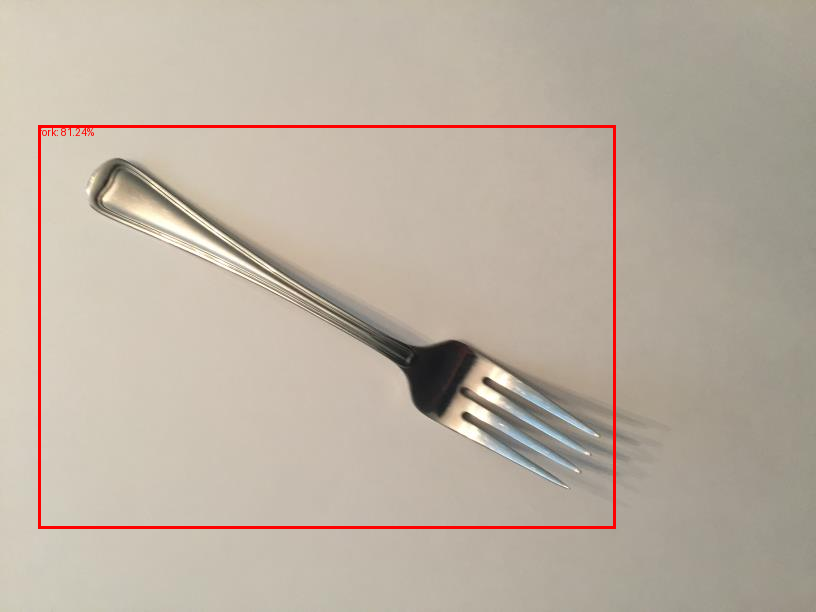

In [18]:
from PIL import Image, ImageDraw
import os

# Define the base location for the images
base_image_location = "../Data/customobjectdetection/"

# Open the sample image and get back the prediction results.
with open(os.path.join(base_image_location, "test", "test_image.jpg"), mode="rb") as test_data:
    results = predictor.detect_image(project.id, publish_iteration_name, test_data)

# Load the image using Pillow
image = Image.open(os.path.join(base_image_location, "test", "test_image.jpg"))
draw = ImageDraw.Draw(image)

threshold = 80
# Display the results and draw bounding boxes for predictions above threshold
for prediction in results.predictions:
    print("\t" + prediction.tag_name + ": {0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))
    if prediction.probability * 100 > threshold:
        left = prediction.bounding_box.left * image.width
        top = prediction.bounding_box.top * image.height
        width = prediction.bounding_box.width * image.width
        height = prediction.bounding_box.height * image.height
        right = left + width
        bottom = top + height

        # Draw the bounding box
        draw.rectangle([left, top, right, bottom], outline="red", width=3)
        draw.text((left, top), f"{prediction.tag_name}: {prediction.probability * 100:.2f}%", fill="red")

# Save or display the image with bounding boxes
image.show()  # To display the image
# image.save("output_image.jpg")  # To save the image

## Further predictions

Run this when you are using the trained model to make predictions for your application

	fork: 81.24% bbox.left = 0.05, bbox.top = 0.21, bbox.width = 0.71, bbox.height = 0.66
	fork: 0.84% bbox.left = 0.57, bbox.top = 0.53, bbox.width = 0.18, bbox.height = 0.30
	fork: 0.77% bbox.left = 0.57, bbox.top = 0.49, bbox.width = 0.43, bbox.height = 0.38
	fork: 0.69% bbox.left = 0.95, bbox.top = 0.35, bbox.width = 0.05, bbox.height = 0.09
	fork: 0.67% bbox.left = 0.95, bbox.top = 0.64, bbox.width = 0.05, bbox.height = 0.08
	fork: 0.65% bbox.left = 0.95, bbox.top = 0.57, bbox.width = 0.05, bbox.height = 0.08
	fork: 0.65% bbox.left = 0.94, bbox.top = 0.21, bbox.width = 0.06, bbox.height = 0.09
	fork: 0.62% bbox.left = 0.95, bbox.top = 0.28, bbox.width = 0.05, bbox.height = 0.09
	fork: 0.61% bbox.left = 0.77, bbox.top = 0.52, bbox.width = 0.19, bbox.height = 0.32
	fork: 0.61% bbox.left = 0.95, bbox.top = 0.50, bbox.width = 0.05, bbox.height = 0.08
	fork: 0.60% bbox.left = 0.95, bbox.top = 0.42, bbox.width = 0.05, bbox.height = 0.09
	fork: 0.58% bbox.left = 0.66, bbox.top = 0.52, bbox.

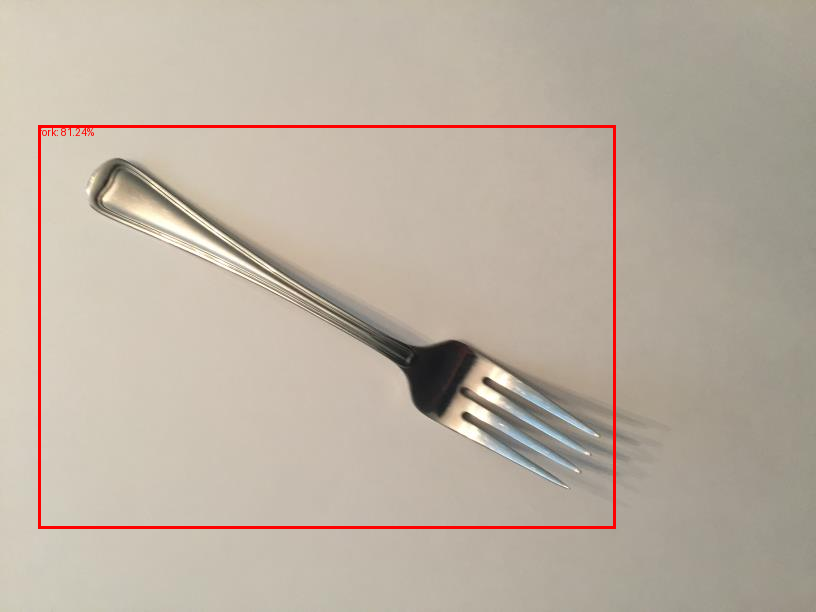

In [19]:
from PIL import Image, ImageDraw
import os
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient

# retrieve environment variables
prediction_endpoint = os.environ["AZURE_CUSTOM_VISION_PREDICTION_ENDPOINT"]
prediction_key = os.environ["AZURE_CUSTOM_VISION_PREDICTION_KEY"]

# Create an instance of the prediction service
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(prediction_endpoint, prediction_credentials)

# Base Image Location
base_image_location = "../Data/customobjectdetection/"

# Go to Custom Vision Studio to get the Project ID and Iteration Name
project_id = "0b5b62ad-0be9-419a-adb2-59ec56294445"
iteration_id = "detectModel"

# Open the sample image and get back the prediction results.
with open(os.path.join (base_image_location, "test", "test_image.jpg"), mode="rb") as test_data:
    results = predictor.detect_image(project_id, iteration_id, test_data)

# Load the image using Pillow
image = Image.open(os.path.join(base_image_location, "test", "test_image.jpg"))
draw = ImageDraw.Draw(image)

threshold = 80
# Display the results and draw bounding boxes for predictions above threshold
for prediction in results.predictions:
    print("\t" + prediction.tag_name + ": {0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))
    if prediction.probability * 100 > threshold:
        left = prediction.bounding_box.left * image.width
        top = prediction.bounding_box.top * image.height
        width = prediction.bounding_box.width * image.width
        height = prediction.bounding_box.height * image.height
        right = left + width
        bottom = top + height

        # Draw the bounding box
        draw.rectangle([left, top, right, bottom], outline="red", width=3)
        draw.text((left, top), f"{prediction.tag_name}: {prediction.probability * 100:.2f}%", fill="red")

# Save or display the image with bounding boxes
image.show()  # To display the image
# image.save("output_image.jpg")  # To save the image

## Clean up resources

In [ ]:
print("Cleaning up...")
# unpublish iteration, delete the iteration, then delete the project
trainer.unpublish_iteration(project.id, iteration.id)
trainer.delete_iteration(project.id, iteration.id)
trainer.delete_project(project.id)

Cleaning up...
